# Epoch 对象的用法示例（一）

## 1. 导入库

In [2]:
import mne
import numpy as np
from matplotlib import pyplot as plt
from mne.datasets import sample
import os

## 2. 读取raw数据

In [3]:
raw = mne.io.read_raw_fif(os.path.join(sample.data_path(), "MEG", "sample", "sample_audvis_raw.fif"))

Opening raw data file C:\Users\mrrai\mne_data\MNE-sample-data\MEG\sample\sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.


## 3. 获取events对象
stim_channel : None | str | list of str  
在mne库的find_events()函数中，通过指定stim_channel参数，我们可以告诉函数应该从哪个信号通道中提取事件信息。  

In [4]:
# 构造事件数组
events = mne.find_events(raw, stim_channel='STI 014')  # 
# 显示事件数
print('Number of events:', len(events))
# 显示所有唯一的事件编号(第3列)
print('Unique event codes:', np.unique(events[:, 2]))  # 所有的第三列数据做一个无重复采样

320 events found
Event IDs: [ 1  2  3  4  5 32]
Number of events: 320
Unique event codes: [ 1  2  3  4  5 32]


In [5]:
"""
使用描述性标签指定感兴趣的事件代码。
给不同的events一个描述性名称。
"""
event_id = {'Auditory/Left': 1, 'Auditory/Right': 2}

## 3. 创建和使用epoch对象

### （1）把原始数据(raw)切分成若干个epoch(时间片段)的集合，

以每个提前标准好的event为参照，取tmin到tmax这一段时间作为一个epoch来进行数据处理。

这里取每个event的前0.1秒和后1秒共1.1秒的时间长度作为一个epoch,为后续同类型的event的epochs叠加(average)分析做准备。

In [6]:
epochs = mne.Epochs(raw, events, event_id, tmin=-0.1, tmax=1,
                    baseline=(None, 0), preload=True)
print(epochs)


Not setting metadata
145 matching events found
Setting baseline interval to [-0.09989760657919393, 0.0] sec
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 3)
3 projection items activated
Loading data for 145 events and 662 original time points ...
0 bad epochs dropped
<Epochs |  145 events (all good), -0.0998976 - 1.00064 sec, baseline -0.0998976 – 0 sec, ~278.6 MB, data loaded,
 'Auditory/Left': 72
 'Auditory/Right': 73>


#### 查看 epochs 的 events信息

In [7]:
print(epochs.events[:3])
print(epochs.event_id)

[[27977     0     2]
 [28771     0     1]
 [29652     0     2]]
{'Auditory/Left': 1, 'Auditory/Right': 2}


In [8]:
print(epochs[1:5])
print(epochs['Auditory/Right'])

<Epochs |  4 events (all good), -0.0998976 - 1.00064 sec, baseline -0.0998976 – 0 sec, ~10.9 MB, data loaded,
 'Auditory/Left': 2
 'Auditory/Right': 2>
<Epochs |  73 events (all good), -0.0998976 - 1.00064 sec, baseline -0.0998976 – 0 sec, ~141.9 MB, data loaded,
 'Auditory/Right': 73>


In [9]:
print(epochs["Right"])

<Epochs |  73 events (all good), -0.0998976 - 1.00064 sec, baseline -0.0998976 – 0 sec, ~141.9 MB, data loaded,
 'Auditory/Right': 73>


In [10]:
print(epochs['Right', 'Left'])

<Epochs |  145 events (all good), -0.0998976 - 1.00064 sec, baseline -0.0998976 – 0 sec, ~278.6 MB, data loaded,
 'Auditory/Left': 72
 'Auditory/Right': 73>


C:\Users\mrrai\AppData\Local\Temp\ipykernel_55648\2167227461.py:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


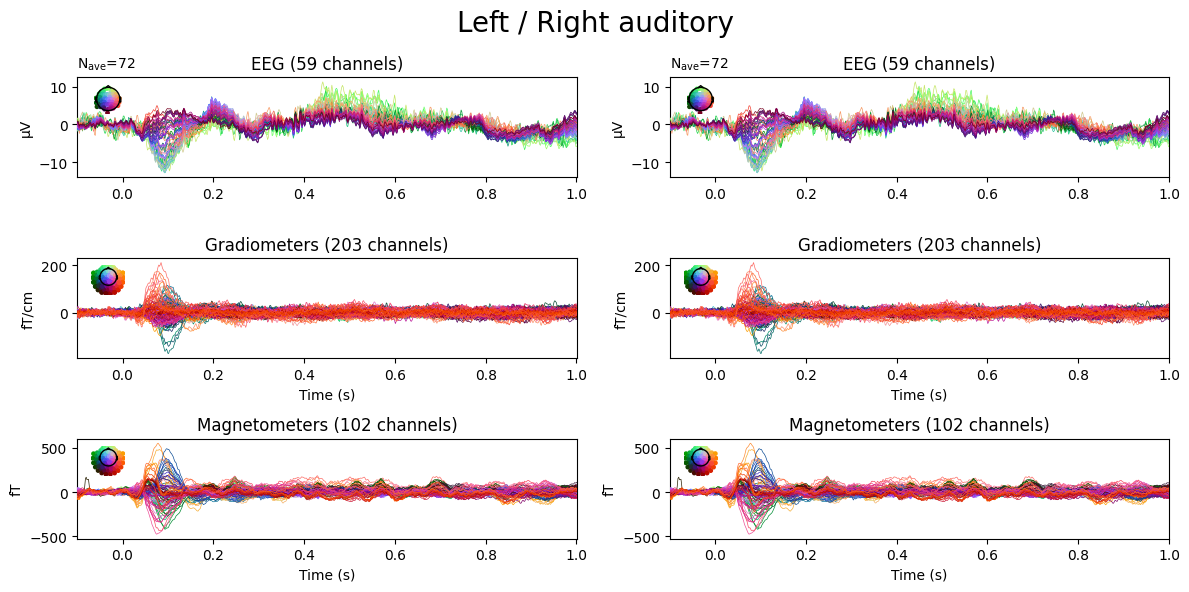

In [12]:
ev_left = epochs["Left"].average()
ev_right = epochs["Right"].average()

fig, axes = plt.subplots(3, 2, figsize=(12,6))
fig.suptitle('Left / Right auditory', fontsize=20)
ev_left.plot(axes=axes[:, 0], show=False, time_unit='s')
ev_left.plot(axes=axes[:, 1], show=False, time_unit='s')
plt.tight_layout()
plt.show()